In [1]:
import math
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import expon
from statsmodels.stats.weightstats import ztest

In [3]:
# Question 1 :- Generate a list of 100 integers containing values between 90 to 130 and store it in the variable `int_list`.After generating the list, 
#               find the following:

int_list = np.random.randint(90,130,100)

#(i) Write a Python function to calculate the mean of a given list of numbers. Create a function to find the median of a list of numbers.
def list_mean(values):
    return np.mean(values)

def list_median(values):
    return np.median(values)

#(ii) Develop a program to compute the mode of a list of integers.
def list_mode(values):
    return sts.mode(values)

#(iii) Implement a function to calculate the weighted mean of a list of values and their corresponding weights.
def weighted_mean(values, weights):
    weighted_sum = sum(v*w for v, w in zip(values,weights))
    total_weight = sum(weights)
    return weighted_sum/total_weight

#(iv) Write a Python function to find the geometric mean of a list of positive numbers.
def geometric_mean(values):
    product = math.prod(values)
    n = len(values)
    return product ** (1 / n)

#(v) Create a program to calculate the harmonic mean of a list of values.
def harmonic_mean(values):
    reciprocal_sum = sum(1 / v for v in values)
    n = len(values)
    return n / reciprocal_sum

#(vi) Build a function to determine the midrange of a list of numbers (average of the minimum and maximum).
def midrange(values):
    minimum = min(values)
    maximum = max(values)
    
    return (minimum + maximum) / 2

#(vii) Implement a Python program to find the trimmed mean of a list, excluding a certain percentage of outliers.
def trimmed_mean(values):
    Q1 = np.percentile(values,25)
    Q3 = np.percentile(values,75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    trimmed_list = []
    for i in values:
        if i > lower_bound and i < upper_bound:
            trimmed_list.append(i)

    return sum(trimmed_list)/len(trimmed_list)

print("List mean is", list_mean(int_list))
print("List median is", list_median(int_list))
print("List mode is", list_mode(int_list))
print("List weighted mean is", weighted_mean(int_list,int_list))
print("List geometric mean is", geometric_mean(int_list))
print("List harmonic mean is", harmonic_mean(int_list))
print("List midrange is", midrange(int_list))
print("List trimmed mean is", trimmed_mean(int_list))

List mean is 109.64
List median is 109.5
List mode is 127
List weighted mean is 110.90441444728201
List geometric mean is 0.0
List harmonic mean is 108.3741732892978
List midrange is 109.5
List trimmed mean is 109.64


C:\Users\91808\AppData\Local\Temp\ipykernel_12912\2847862836.py:25: RuntimeWarning: overflow encountered in scalar multiply
  product = math.prod(values)


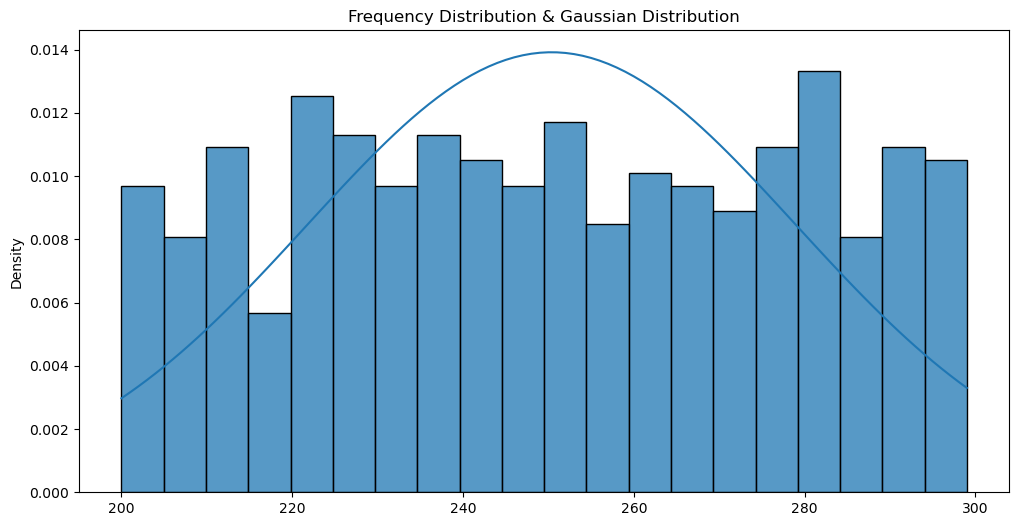

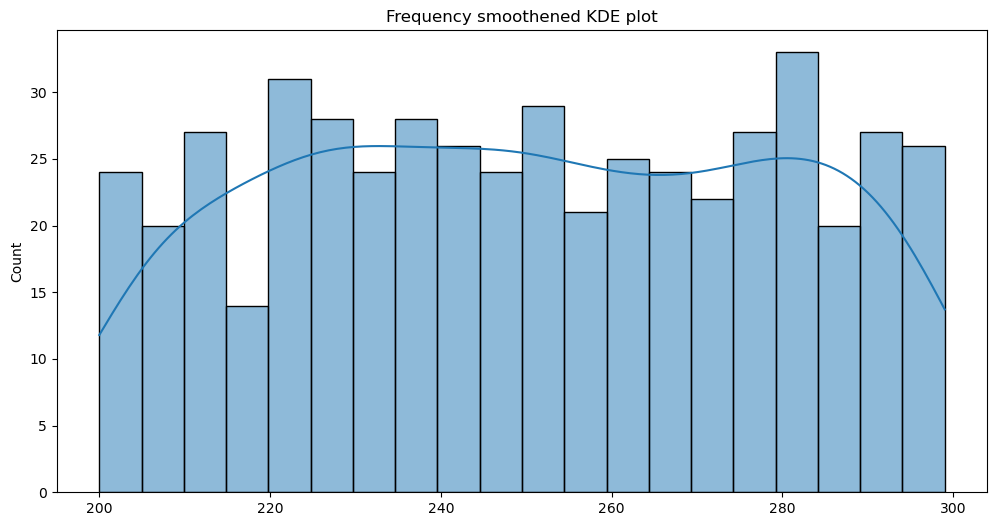

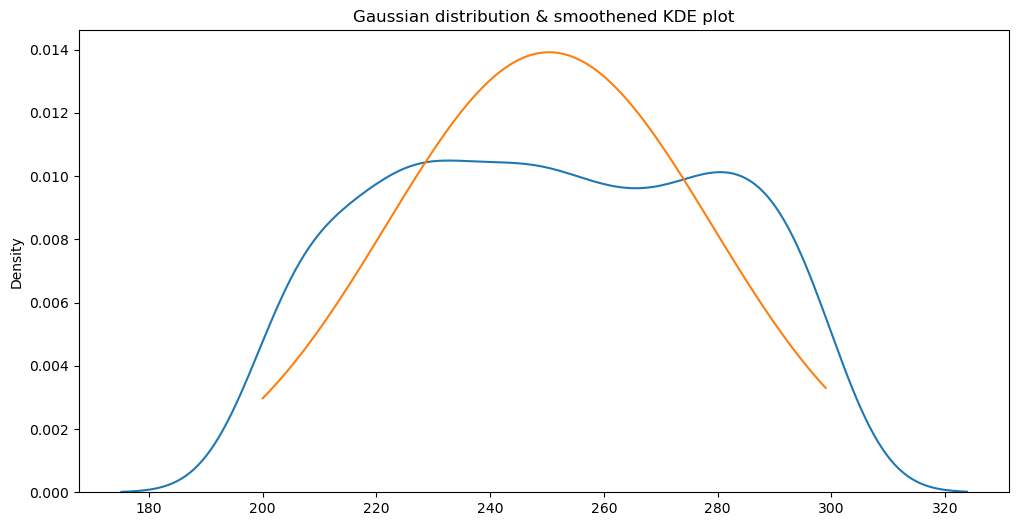

Range of the list is 99
Variance of the list is 821.704576
Standard deviation of the list is 28.665389863038666
Interquartile range of the list is (151.0, 351.0)
Coefficient of variation of the list is 11.449302571829733
Mean Absolute Deviation of the list is 24.736416
Quartile deviation of the list is 25.0
Range based coefficient of dispersion of the list is 0.19839679358717435


In [4]:
# Question 2 :- Generate a list of 500 integers containing values between 200 to 300 and store it in the variable `int_list2`. After generating the list, 
#               find the following:

int_list2 = np.random.randint(200,300,500)

# (i) Compare the given list of visualization for the given data:
#     1. Frequency & Gaussian distribution
#     2. Frequency smoothened KDE plot
#     3. Gaussian distribution & smoothened KDE plot

mean, std = np.mean(int_list2), np.std(int_list2)
x = np.linspace(min(int_list2), max(int_list2), 100)

plt.figure(figsize=(12, 6))
sns.histplot(int_list2, bins=20, stat='density', label="Frequency")
plt.plot(x, norm.pdf(x, mean, std), label="Gaussian Distribution")
plt.title("Frequency Distribution & Gaussian Distribution")
plt.show()

plt.figure(figsize = (12,6))
sns.histplot(int_list2, bins = 20, kde = True, label = "Frequency")
plt.title("Frequency smoothened KDE plot")
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(int_list2, label = "Smoothened KDE plot")
plt.plot(x, norm.pdf(x, mean, std), label="Gaussian Distribution")
plt.title("Gaussian distribution & smoothened KDE plot")
plt.show()

# (ii) Write a Python function to calculate the range of a given list of numbers.
def range(lis):
    return max(lis) - min(lis)

# (iii) Create a program to find the variance and standard deviation of a list of numbers.
def variance(lis):
    return np.var(lis)

def std(lis):
    return np.std(lis)

#(iv) Implement a function to compute the interquartile range (IQR) of a list of values.
def interquartile_range(values):
    Q1 = np.percentile(values,25)
    Q3 = np.percentile(values,75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

#(v) Build a program to calculate the coefficient of variation for a dataset.
def coefficient_of_variation(lis):
    mean = np.mean(lis)
    std_dev = np.std(lis)
    cv = (std_dev/mean) * 100
    return cv

#(vi) Write a Python function to find the mean absolute deviation (MAD) of a list of numbers.
def MAD(lis):
    mean = np.mean(lis)
    mad = np.mean(np.abs(lis-mean))
    return mad

# (vii) Create a program to calculate the quartile deviation of a list of values.
def quartile_deviation(lis):
    Q1 = np.percentile(lis,25)
    Q3 = np.percentile(lis,75)

    QD = (Q3-Q1)/2
    return QD

# (viii) Implement a function to find the range-based coefficient of dispersion for a dataset.
def range_based_coefficient_of_dispersion(lis):
    max_val = max(lis)
    min_val = min(lis)
    rcd = (max_val - min_val) / (max_val + min_val)
    return rcd

print("Range of the list is", range(int_list2))
print("Variance of the list is", variance(int_list2))
print("Standard deviation of the list is", std(int_list2))
print("Interquartile range of the list is", interquartile_range(int_list2))
print("Coefficient of variation of the list is", coefficient_of_variation(int_list2))
print("Mean Absolute Deviation of the list is", MAD(int_list2))
print("Quartile deviation of the list is", quartile_deviation(int_list2))
print("Range based coefficient of dispersion of the list is", range_based_coefficient_of_dispersion(int_list2))

In [8]:
# Question 3 :- Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.

class DiscreteRandomVariable:
    def __init__(self, valuesProbabilities):
        self.valuesProbabilities = valuesProbabilities

    def expectedValue(self):
        return sum(value * probability for value, probability in self.valuesProbabilities.items())

    def variance(self):
        mean = self.expectedValue()
        return sum(((value - mean) ** 2) * probability for value, probability in self.valuesProbabilities.items())

values_probabilities = {
    1: 1/6,
    2: 1/6,
    3: 1/6,
    4: 1/6,
    5: 1/6,
    6: 1/6
}

randomVariable = DiscreteRandomVariable(values_probabilities)
print("Expected value of random variable is", randomVariable.expectedValue())
print("Variance of random variable is", randomVariable.variance())

Expected value of random variable is 3.5
Variance of random variable is 2.9166666666666665


In [10]:
# Question 4 :- Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.

class DiscreteRandomVariable:
    def __init__(self, valuesProbabilities):
        self.valuesProbabilities = valuesProbabilities

    def expectedValue(self):
        return sum(value * probability for value, probability in self.valuesProbabilities.items())

    def variance(self):
        mean = self.expectedValue()
        return sum(((value - mean) ** 2) * probability for value, probability in self.valuesProbabilities.items())

values_probabilities = {
    1: 1/6,
    2: 1/6,
    3: 1/6,
    4: 1/6,
    5: 1/6,
    6: 1/6
}

randomVariable = DiscreteRandomVariable(values_probabilities)
print("Expected value of random variable is", randomVariable.expectedValue())
print("Variance of random variable is", randomVariable.variance())

Expected value of random variable is 3.5
Variance of random variable is 2.9166666666666665


In [12]:
# Question 5 :-  Create a Python function to generate random samples from a given probability distribution (e.g., binomial, Poisson) and 
#                calculate their mean and variance.

def generate_samples(dist, params):
    size = 1000

    if(dist == 'binomial'):
        n,p = params
        sample = np.random.binomial(n,p,size)
    else:
        lam = params
        sample = np.random.poisson(lam,size)

    mean = np.mean(sample)
    variance = np.var(sample)

    return mean, variance

print("Mean and variance of binomial distribution", generate_samples('binomial',(10,0.5)))
print("Mean and variance of poisson distribution", generate_samples('poisson', (100,)))

Mean and variance of binomial distribution (4.967, 2.571911)
Mean and variance of poisson distribution (100.16, 107.7764)


In [14]:
# Question 6 :- Write a Python script to generate random numbers from a Gaussian (normal) distribution and compute the mean, variance, and standard 
#               deviation of the samples.

def generate_gaussian_distribution():
    samples = np.random.normal(1000)
    return np.mean(samples), np.var(samples), np.std(samples)

print("Mean, variance and standard deviation of the samples are", generate_gaussian_distribution())

Mean, variance and standard deviation of the samples are (1000.3563222719459, 0.0, 0.0)


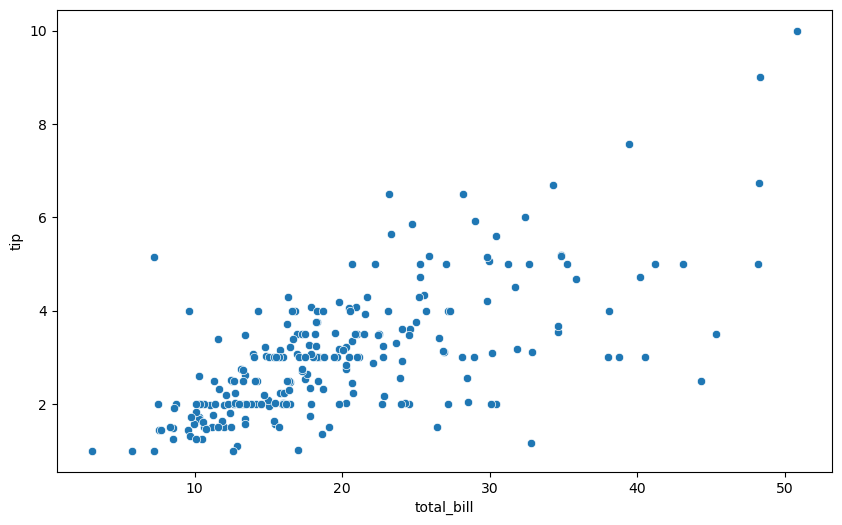

In [16]:
# Question 7 :- Use seaborn library to load tips dataset. Find the following from the dataset for the columns total_bill and tip :

dataset = sns.load_dataset('tips')
ds = dataset[['total_bill','tip']]

# 1. Write a Python function that calculates their skewness.
def skewness(ds, columns):
    skew = {}
    
    for col in columns:
        skew[col] = stats.skew(ds[col])

    return skew

# 2. Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is approximately symmetric.
def skewness_test(ds, columns):
    skew = skewness(ds, columns)
    skew_test = {}

    for i in skew:
        if -0.5 <= i <= 0.5:
            skew_test[i] = 'Approximately symmetric'
        elif i < -0.5:
            skew_test[i] = 'Negative skewness'
        else:
            skew_test[i] = 'Positive skewness'

    return skew_test

# 3. Write a function that calculates the covariance between two columns.
def co_variance(ds, col1, col2):
    return ds[[col1, col2]].cov()

# 4. Implement a Python program that calculates the Pearson correlation coefficient between two columns.
def co_relation(ds, col1, col2):
    return ds[col1].corr(ds[col2])

# 5. Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots.
column1 = 'total_bill'
column2 = 'tip'

plt.figure(figsize= (10,6))
sns.scatterplot(data = ds, x = column1, y = column2)
plt.show()

In [18]:
# Question 8 :- Write a Python function to calculate the probability density function of a continuous random variable for a given normal distribution.
def probability_density_function(data_point):
    return norm.pdf(data_point)

print(probability_density_function(1))

0.24197072451914337


In [20]:
# Question 9 :-  Create a program to calculate the cumulative distribution function (CDF) of exponential distribution.
def cumulative_distribution_function(data_point):
    return norm.cdf(data_point)

print(cumulative_distribution_function(2))

0.9772498680518208


In [22]:
# Question 10 :- Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.

def probability_mass_function(data_point, lam):
    return stats.poisson.pmf(data_point, lam)

print(probability_mass_function(3,5))

0.1403738958142805


In [24]:
# Question 11 :- A company wants to test if a new website layout leads to a higher conversion rate (percentage of visitors who make a purchase). 
#                They collect data from the old and new layouts to compare. Apply z-test to find which layout is successful.

old_layout = np.array([1] * 50 + [0] * 950)
new_layout = np.array([1] * 70 + [0] * 930)

trials = [len(old_layout), len(new_layout)]
successes = [old_layout.sum(), new_layout.sum()]

z_stats, pvalue = sm.stats.proportions_ztest(successes, trials)

if pvalue <= 0.05:
    print("Reject the null hypothesis, The new layout has higher conversion rate")
else:
    print("Fail to reject the null hythesis, Both the layouts has the similar conversion rate")

Fail to reject the null hythesis, Both the layouts has the similar conversion rate


In [7]:
# Question 12 :- A tutoring service claims that its program improves students' exam scores. A sample of students who participated in the program was 
#                taken, and their scores before and after the program were recorded. Use z-test to find if the claims made by tutor are true or false.

before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

differences = after_program - before_program

z_stats, p_value = ztest(differences, value = 0)

if p_value <= 0.05:
    print("Reject the null hypothesis, tutoring service improves students scores in exams")
else:
    print("Fail to reject the null hypothesis, tutoring doesn't improve students exam scores")

Reject the null hypothesis, tutoring service improves students scores in exams


In [9]:
# Question 13 :- A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study and record 
#                blood pressure measurements before and after administering the drug. Implement z-test to find if the drug really works or not.

before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

differences = after_drug - before_drug

z_stats, p_value = ztest(differences, value = 0)

if p_value <= 0.05:
    print("Reject the null hypothesis, new drug is effective in reducing the blood pressure")
else:
    print("Fail to reject the null hypothesis, new drug is not effective in reducing the blood pressure")

Reject the null hypothesis, new drug is effective in reducing the blood pressure


In [13]:
# Question 14 :- A customer service department claims that their average response time is less than 5 minutes. A sample of recent customer interactions 
#             was taken, and the response times were recorded. Implement z-test to find the claims made by customer service department are true or false.

# Question requirements are wrong. We cannot apply z test when sample std is not given or sample size is less than 30. So we will apply t test here.
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
pop_mean = 5

z_stats, p_value = ztest(response_times, value = pop_mean)

if p_value <= 0.05:
    print("Reject the null hypothesis, claims made by customer service department are false")
else:
    print("Fail to reject null hypothesis, claims made by customer service department is true")

Reject the null hypothesis, claims made by customer service department are false


In [23]:
# Question 15 :-  A company is testing two different website layouts to see which one leads to higher click-through rates. Write a Python function to 
#                 perform an A/B test analysis, including calculating the t-statistic, degrees of freedom, and p-value.

def AB_analysis(layout_a_clicks, layout_b_clicks):
    layout_a_clicks = np.array(layout_a_clicks)
    layout_b_clicks = np.array(layout_b_clicks)
    
    t_stats, p_value = stats.ttest_ind(layout_a_clicks, layout_b_clicks, equal_var = False)
    dof = len(layout_a_clicks) + len(layout_b_clicks) - 2

    if p_value <= 0.05:
        print("Reject the null hypothesis, layout b has higher click rates")
    else:
        print("Fail to reject the null hypothesis, both layouts has same click rates")
    
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

AB_analysis(layout_a_clicks, layout_b_clicks)

Reject the null hypothesis, layout b has higher click rates


In [29]:
# Question 16 :- A pharmaceutical company wants to determine if a new drug is more effective than an existing drug in reducing cholesterol levels. 
#                Create a program to analyze the clinical trial data and calculate the tstatistic and p-value for the treatment effect.

existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

existing_drug_levels = np.array(existing_drug_levels)
new_drug_levels = np.array(new_drug_levels)

t_stats, p_value = stats.ttest_ind(existing_drug_levels, new_drug_levels, equal_var = False)

if p_value <= 0.05:
    print("Reject the null hypothesis, new drug is more effective than an existing drug in reducing cholesterol levels.")
else:
    print("Fail to reject the null hypothesis, new drug is not more effective than an existing drug in reducing cholesterol levels.")

Reject the null hypothesis, new drug is more effective than an existing drug in reducing cholesterol levels.


In [31]:
# Question 17 :- A school district introduces an educational intervention program to improve math scores. Write a Python function to analyze pre- and 
#                post-intervention test scores, calculating the t-statistic and p-value to determine if the intervention had a significant impact.

def intervention_test(pre_intervention_scores, post_intervention_scores):
    pre_intervention_scores = np.array(pre_intervention_scores)
    post_intervention_scores = np.array(post_intervention_scores)
    
    t_stats, p_value = stats.ttest_rel(pre_intervention_scores, post_intervention_scores)

    if p_value <= 0.05:
        print("Reject the null hypothesis, intervention program increased the math socre")
    else:
        print("Fail to reject the null hypothesis, intervention program has no effect on the math socre")


pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

intervention_test(pre_intervention_scores, post_intervention_scores)

Reject the null hypothesis, intervention program increased the math socre


In [37]:
# Question 18 :- An HR department wants to investigate if there's a gender-based salary gap within the company. Develop a program to analyze salary data,
#                calculate the t-statistic, and determine if there's a statistically significant difference between the average salaries of male and 
#                female employees.

np.random.seed(0)
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

t_stats, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var = False)

dof = len(male_salaries) + len(female_salaries) - 2
alpha = 0.05

t_critical = stats.t.ppf(1 - alpha/2, df = dof)
    
if abs(t_stats) > t_critical:
    print("Reject the null hypothesis, there is a gender-based salary difference")
else:
    print("Fail to reject the null hypothesis, there is no gender-based salary difference")

Fail to reject the null hypothesis, there is no gender-based salary difference


In [41]:
# Question 19 :- A manufacturer produces two different versions of a product and wants to compare their quality scores. Create a Python function to 
#                analyze quality assessment data, calculate the t-statistic, and decide whether there's a significant difference in quality between the 
#                two versions.

def quality_analysis(version1_scores, version2_scores):
    version1_scores = np.array(version1_scores)
    version2_scores = np.array(version2_scores)

    t_stats, p_value = stats.ttest_ind(version1_scores, version2_scores, equal_var = False)

    dof = len(version1_scores) + len(version2_scores) - 2
    alpha = 0.05

    t_critical = stats.t.ppf(1 - alpha/2, df = dof)

    if abs(t_stats) > t_critical:
        print("Reject the null hypothesis, there's a significant difference in quality between the two versions.")
    else:
        print("Fail to reject the null hypothesis, there's a significant difference in quality between the two versions.")

version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

quality_analysis(version1_scores, version2_scores)

Reject the null hypothesis, there's a significant difference in quality between the two versions.


In [45]:
# Question 20 :- A restaurant chain collects customer satisfaction scores for two different branches. Write a program to analyze the scores, 
#               calculate the t-statistic, and determine if there's a statistically significant difference in customer satisfaction between the branches.

branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

branch_a_scores = np.array(branch_a_scores)
branch_b_scores = np.array(branch_b_scores)

t_stats, p_value = stats.ttest_ind(branch_a_scores, branch_b_scores)

dof = len(branch_a_scores) - 1
alpha = 0.05

t_critical = stats.t.ppf(1 - alpha/2, df = dof)

if abs(t_stats) > t_critical:
    print("Reject the null hypothesis, significant difference in customer satisfaction between the branches.")
else:
    print("Fail to reject the null hypothesis, customer satisfaction between the branches is same.")

Reject the null hypothesis, significant difference in customer satisfaction between the branches.


In [49]:
# Question 21 :- A political analyst wants to determine if there is a significant association between age groups and voter preferences (Candidate A or 
#                Candidate B). They collect data from a sample of 500 voters and classify them into different age groups and candidate preferences. 
#                Perform a Chi-Square test to determine if there is a significant association between age groups and voter preferences.

np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=30)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)

data = pd.DataFrame({'Age Group' : age_groups, 'Voter Preferences' : voter_preferences})

Contingency_Table = pd.crosstab(data['Age Group'], data['Voter Preferences'])

chi2_stats, p_value, dof, exxpected_value = stats.chi2_contingency(Contingency_Table)

if p_value <= 0.05:
    print("Reject the null hypothesis, There is a significant association between age groups and voter preferences.")
else:
    print("Fail to reject the null hypothesis, There is no a significant association between age groups and voter preferences.")

Fail to reject the null hypothesis, There is no a significant association between age groups and voter preferences.


In [11]:
# Question 22 :- A company conducted a customer satisfaction survey to determine if there is a significant relationship between product satisfaction 
#                levels (Satisfied, Neutral, Dissatisfied) and the region where customers are located (East, West, North, South). The survey data is 
#                summarized in a contingency table. Conduct a ChiSquare test to determine if there is a significant relationship between product 
#                satisfaction levels and customer regions.

#Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])
satisfaction_levels = ['Satisfied', 'Neutral', 'Dissatisfied']
location = ['East', 'West', 'North', 'South']

contingency_table = pd.DataFrame(data, index = satisfaction_levels, columns = location)

chi2_stats, p_value, dof, exxpected_value = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis, There is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("Fail to reject the null hypothesis, There is no significant relationship between product satisfaction levels and customer regions.")

Reject the null hypothesis, There is a significant relationship between product satisfaction levels and customer regions.


In [25]:
# Question 23 :-  A company implemented an employee training program to improve job performance (Effective, Neutral, Ineffective). After the training, 
#                 they collected data from a sample of employees and classified them based on their job performance before and after the training. 
#                 Perform a Chi-Square test to determine if there is a significant difference between job performance levels before and after the 
#                 training.

# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])
performance = ['Effective', 'Neutral', 'Ineffective']

contingency_table = pd.DataFrame(data, index = performance, columns = performance)

chi2_stats, p_value, dof, exxpected_value = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis, there is a significant difference between job performance levels before and after the training.")
else:
    print("Fail to reject the null hypothesis, there is no significant difference between job performance levels before and after the training.")

Reject the null hypothesis, there is a significant difference between job performance levels before and after the training.


In [27]:
# Question 24 :- A company produces three different versions of a product: Standard, Premium, and Deluxe. The company wants to determine if there is a 
#                significant difference in customer satisfaction scores among the three product versions. They conducted a survey and collected customer 
#                satisfaction scores for each version from a random sample of customers. Perform an ANOVA test to determine if there is a significant 
#                difference in customer satisfaction scores.

standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

f_stats, p_value = stats.f_oneway(standard_scores, premium_scores, deluxe_scores)

if p_value < 0.05:
    print("Reject the null hypothesis, there is a significant difference in customer satisfaction scores.")
else:
    print("Fail to reject the null hypothesis, there is no significant difference in customer satisfaction scores.")

Reject the null hypothesis, there is a significant difference in customer satisfaction scores.
